In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 6]
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score

from sklearn.ensemble import RandomForestRegressor


from sklearn import metrics

from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge,Lasso


# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

In [59]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [60]:
# We are going to build a model that will predict the Price of the House

# It seems that there will be correlation between the area and price

# Pre Checks

In [61]:
df.shape

(545, 13)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [63]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4766729.247706,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1870439.615657,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1750000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3430000.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4340000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5740000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,13300000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning

In [64]:
# to know the percent of missing values
(df.isnull().sum() /df.index.size) *100

# there is no null values

price              0.000000
area               0.000000
bedrooms           0.000000
bathrooms          0.000000
stories            0.000000
mainroad           0.000000
guestroom          0.000000
basement           0.000000
hotwaterheating    0.000000
airconditioning    0.000000
parking            0.000000
prefarea           0.000000
furnishingstatus   0.000000
dtype: float64

# Outliers 

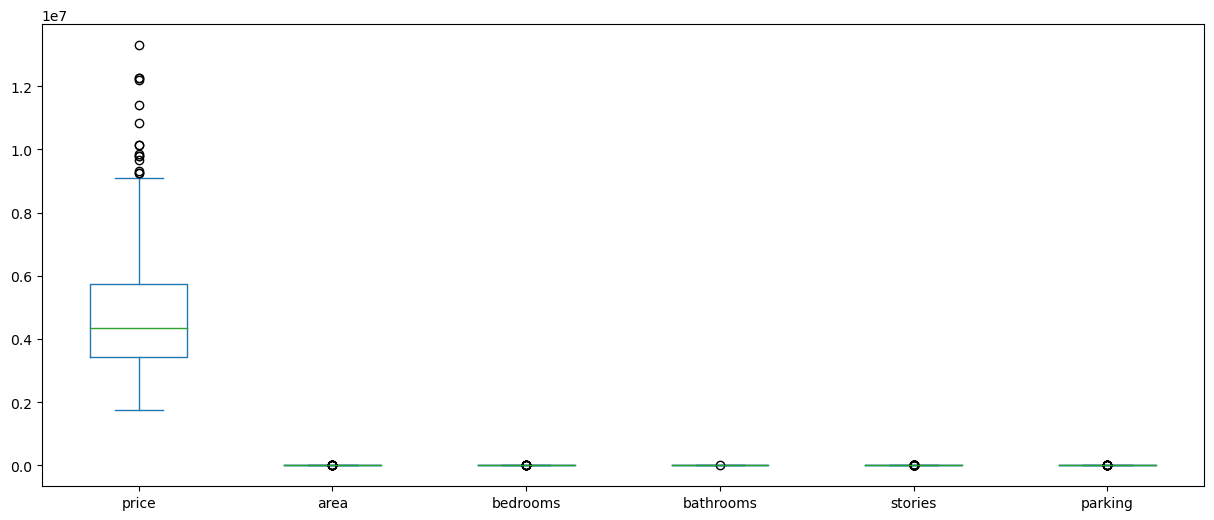

In [65]:
df.plot(kind='box')
plt.show()

In [66]:
# Seperate the Numerical variables

cols=list(df.select_dtypes(include=np.number).columns)
cols

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

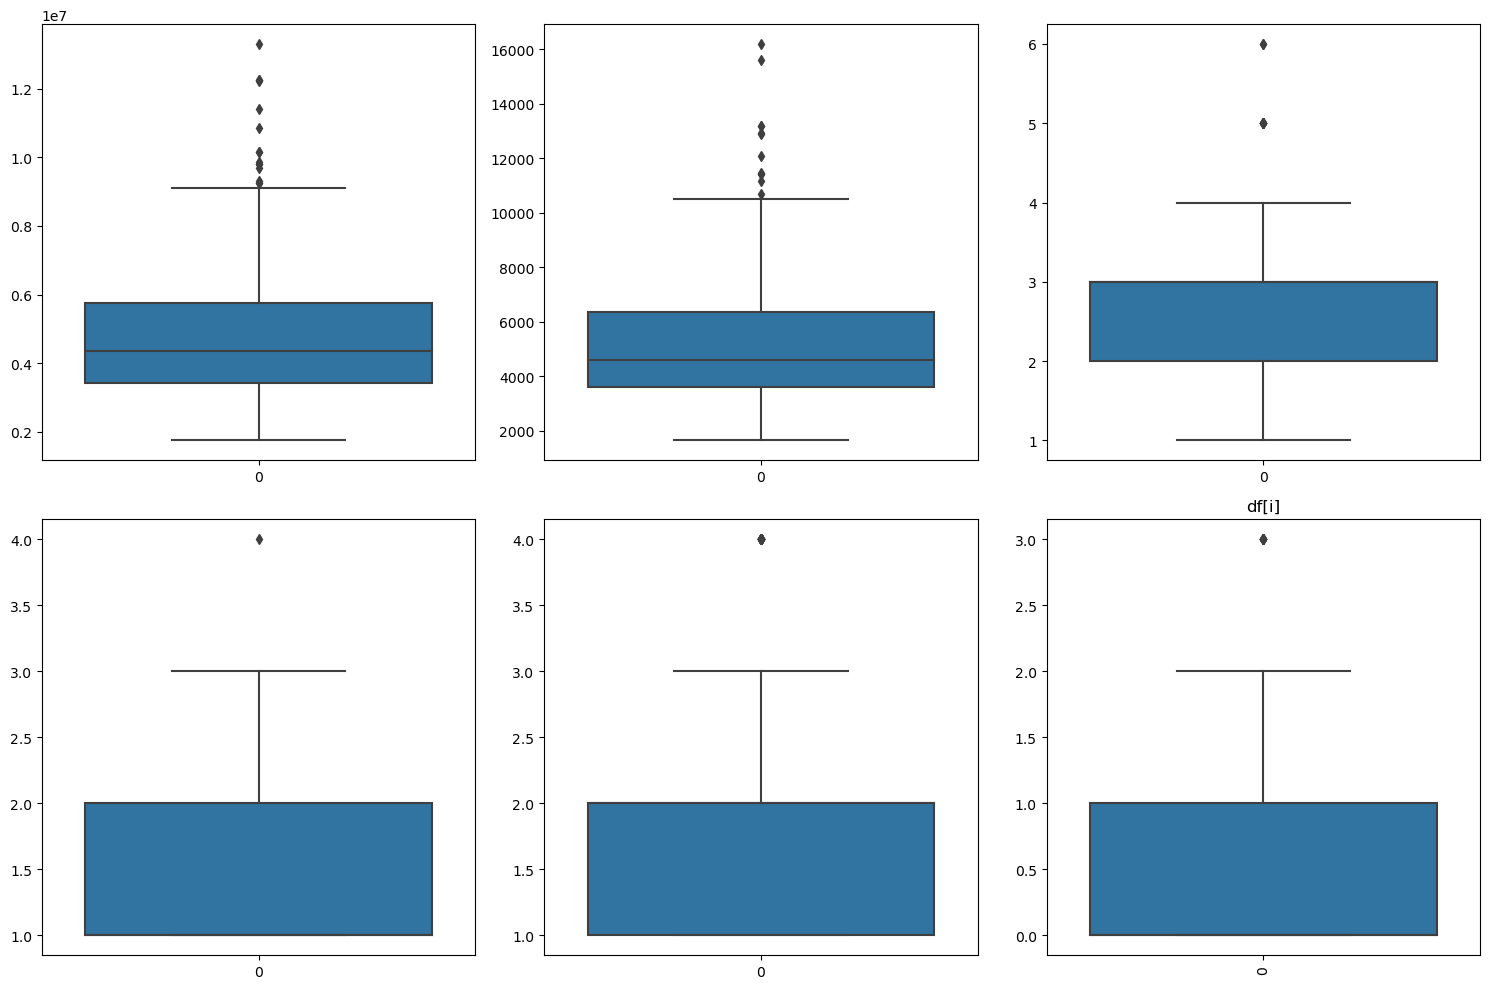

In [67]:
fig, ax= plt.subplots(2,3, figsize=(15,10))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]')
    plt.xticks(rotation = 'vertical', fontsize = 10)

plt.tight_layout()
plt.show()

# we have huge outliers in price and area so that it can be droped 

In [68]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [69]:
#Remove the Outliers

q1 =df.quantile(0.25)
q3= df.quantile(0.75)
iqr=q3-q1

upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr

In [70]:
df = df[~((df < (lower_limit)) | (df > (upper_limit))).any(axis=1)]

In [71]:
df.shape

(463, 13)

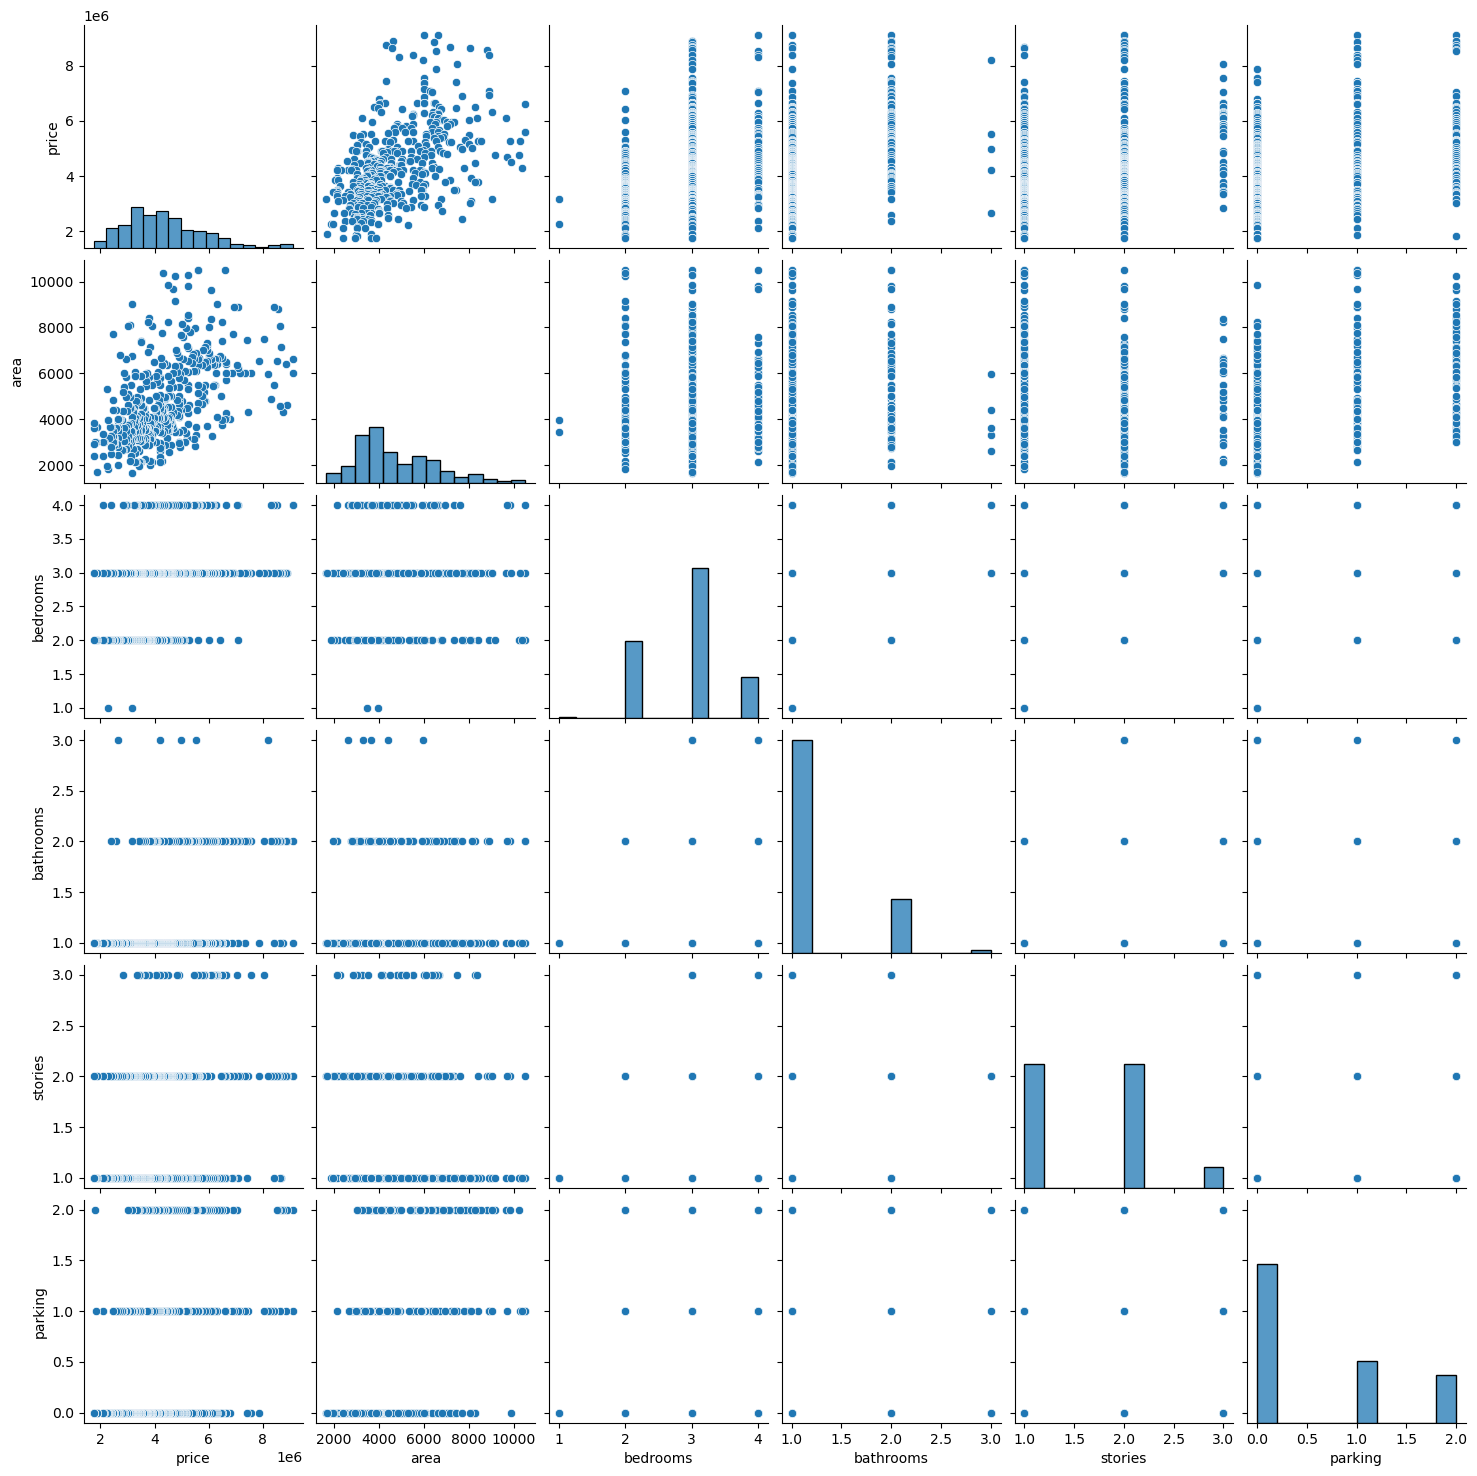

In [72]:
# Visualising Numeric Variables

sns.pairplot(df)
plt.show()

In [73]:
cat=list(df.select_dtypes(exclude=np.number).columns)
cat

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             463 non-null    int64 
 1   area              463 non-null    int64 
 2   bedrooms          463 non-null    int64 
 3   bathrooms         463 non-null    int64 
 4   stories           463 non-null    int64 
 5   mainroad          463 non-null    object
 6   guestroom         463 non-null    object
 7   basement          463 non-null    object
 8   hotwaterheating   463 non-null    object
 9   airconditioning   463 non-null    object
 10  parking           463 non-null    int64 
 11  prefarea          463 non-null    object
 12  furnishingstatus  463 non-null    object
dtypes: int64(6), object(7)
memory usage: 50.6+ KB


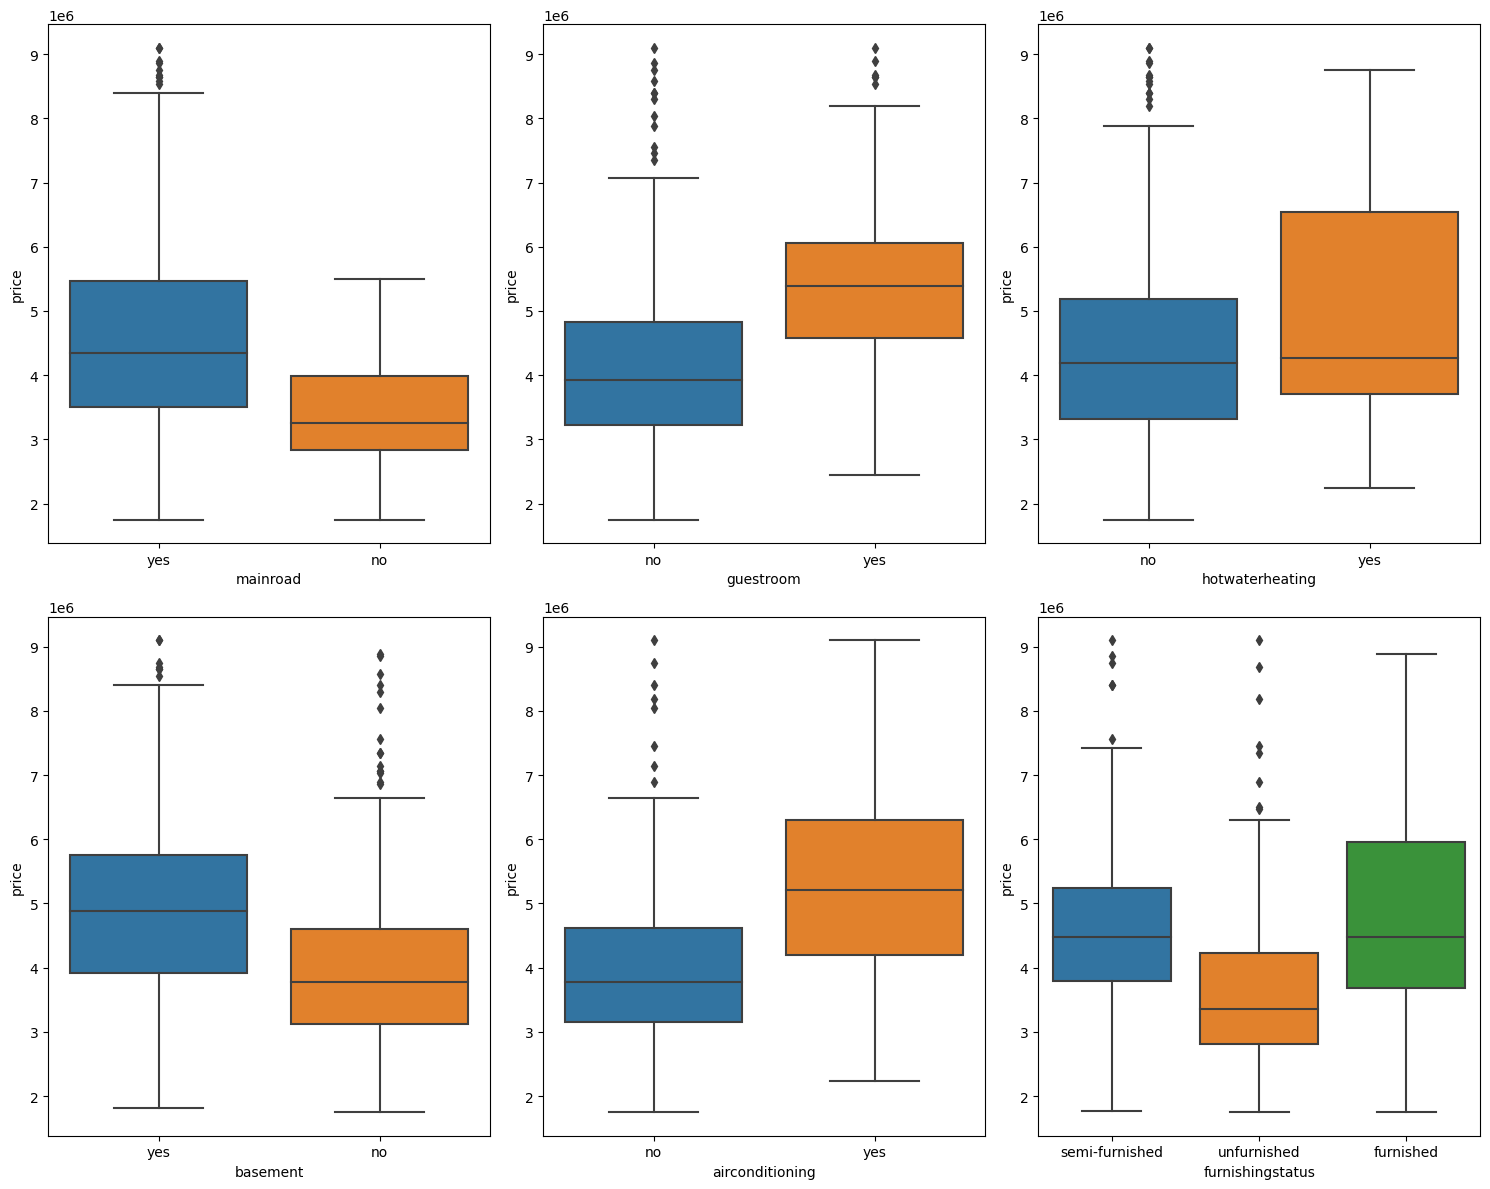

In [75]:
# bivariant 
plt.figure(figsize=(15,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='hotwaterheating',y='price',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='basement',y='price',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=df)
plt.tight_layout()
plt.show()

If we look at the boxplot the houses which are on mainroad, having guestroom, having hotwater facility,
with basement, airconditioning and semi furinished and fully furnished are expensive and more than compared to 
houses with not havng most facilities

# Data Preparation

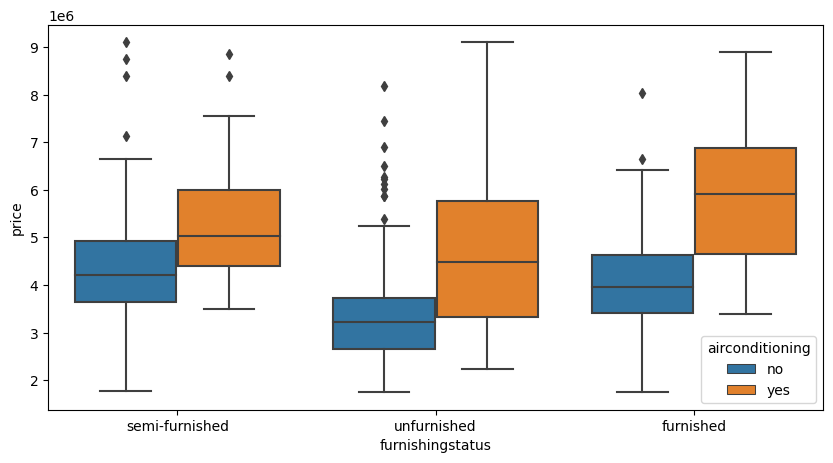

In [76]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

In [77]:
df.replace({'yes': 1, "no": 0},inplace=True)

#we can see that the dataset has many columns with values as 'Yes' or 'No'. 
# So it can be replaced by the object variables 'YES' and "NO" to 1 and 0

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             463 non-null    int64 
 1   area              463 non-null    int64 
 2   bedrooms          463 non-null    int64 
 3   bathrooms         463 non-null    int64 
 4   stories           463 non-null    int64 
 5   mainroad          463 non-null    int64 
 6   guestroom         463 non-null    int64 
 7   basement          463 non-null    int64 
 8   hotwaterheating   463 non-null    int64 
 9   airconditioning   463 non-null    int64 
 10  parking           463 non-null    int64 
 11  prefarea          463 non-null    int64 
 12  furnishingstatus  463 non-null    object
dtypes: int64(12), object(1)
memory usage: 50.6+ KB


# Dummy Variables

In [79]:
#The variable furnishingstatus has three levels.So it can be converted into integer 
#for that I'm using Dummy Variables



en_furniture=pd.get_dummies(df['furnishingstatus'],drop_first=True).astype('uint8')


In [80]:
df= pd.concat([df, en_furniture], axis = 1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [81]:
# Howeve I have created the dummies for "furnishingstatus" so i am dropping it

df.drop('furnishingstatus',axis=1,inplace=True)

# scaling the Features

In [82]:
mm=MinMaxScaler()
df_scaled=pd.DataFrame(mm.fit_transform(df),columns=df.columns)
df_scaled

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.491525,1.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,1.000000,0.559322,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.500000,1.000000,0.000000,1.000000
2,0.971429,0.333333,0.666667,0.500000,0.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3,0.966667,0.538983,0.666667,0.500000,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,1.000000,0.000000
4,0.952381,0.301695,0.666667,0.000000,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0.009524,0.152542,0.333333,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
459,0.002333,0.084746,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
460,0.000000,0.222599,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
461,0.000000,0.142373,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


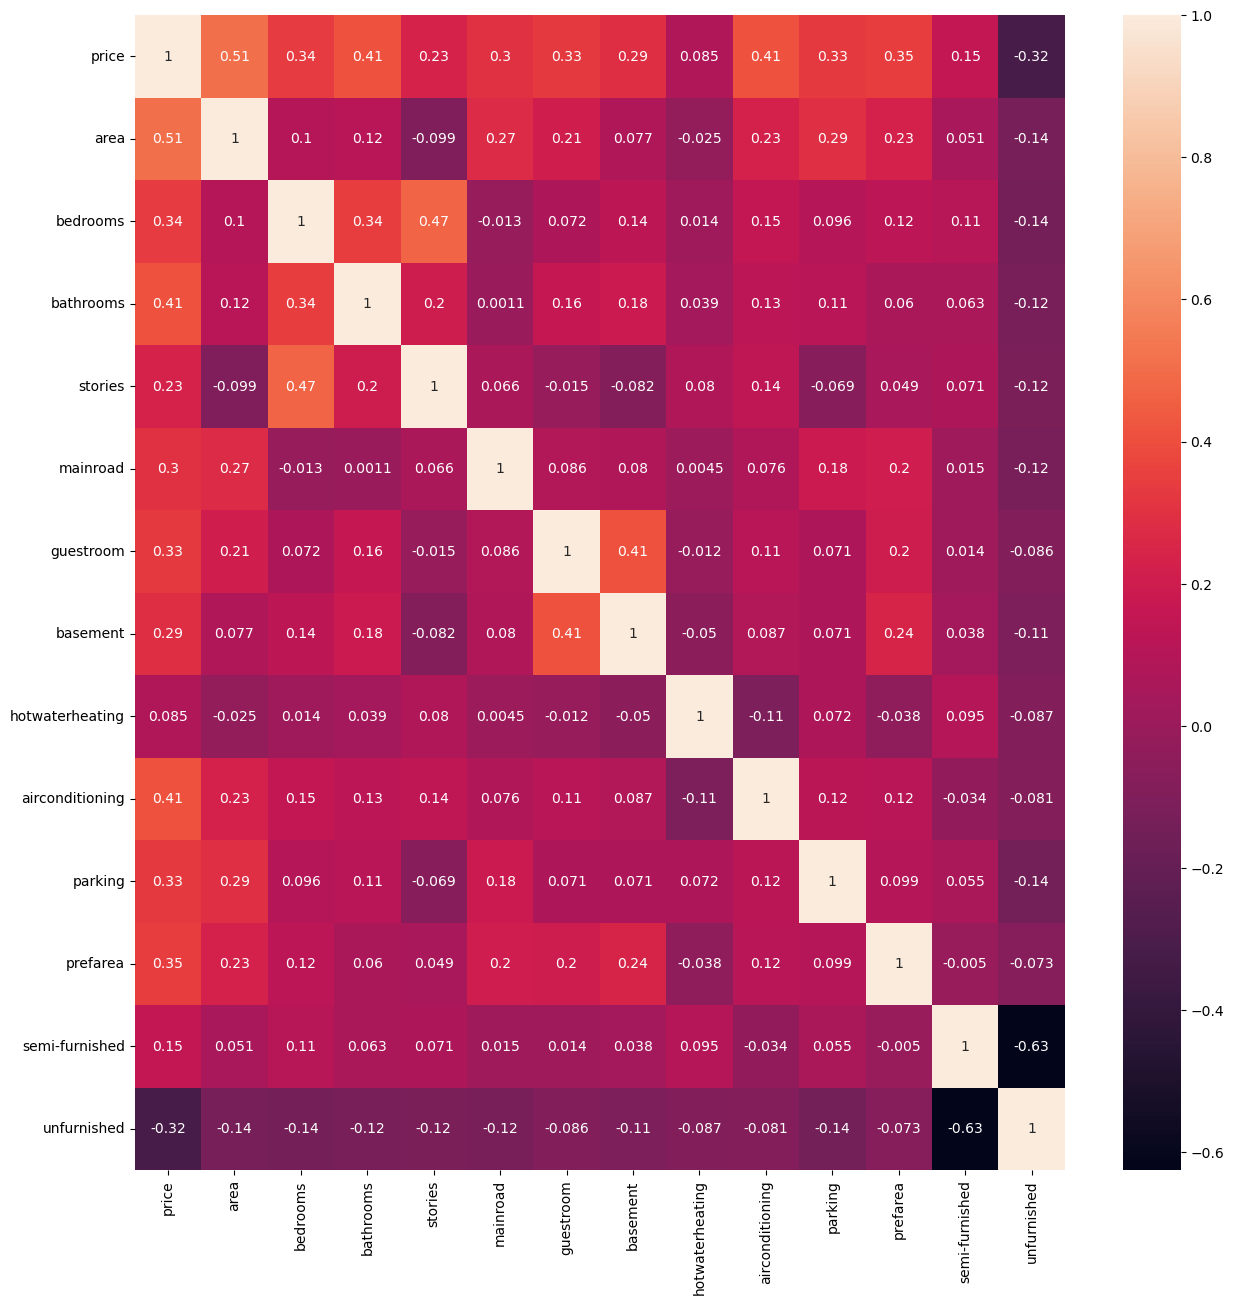

In [83]:
plt.figure(figsize=(15,15))
sns.heatmap(df_scaled.corr(),annot=True)
plt.show()

In [84]:
# Area,bathroms,bedrooms,stories with price seems to have a good correlation


# Splitting the Data into Train and Testing Data

In [85]:
X=df_scaled.drop('price',axis=1)
y=df_scaled['price']

In [86]:
xtrain,xtest,ytrain,ytest= train_test_split(X,y, test_size = 0.2, random_state = 100)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((370, 13), (93, 13), (370,), (93,))

# Model Building

In [90]:
lin_reg = LinearRegression()
# train the model with input and output data - train
model = lin_reg.fit(xtrain,ytrain)

#test the model with input  data - test
y_pred = model.predict(xtest)
lin_reg.fit(xtest,y_pred)

LinearRegression()

# Model Evaluation

In [92]:
# model evaluation for training set
y_pred = lin_reg.predict(xtrain)
rmse = (np.sqrt(mean_squared_error(ytrain, y_pred)))
print("rmse:",rmse)
# R square value - training dataset
r2 =  r2_score(ytrain, y_pred)
print("R- Square:",r2)

rmse: 0.12382556885301842
R- Square: 0.6081897722218863


# OLS - model summary

In [93]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              346.0
Date:                Sun, 03 Dec 2023   Prob (F-statistic):                   9.97e-225
Time:                        12:08:02   Log-Likelihood:                          312.30
No. Observations:                 463   AIC:                                     -598.6
Df Residuals:                     450   BIC:                                     -544.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area                0.3027      0.032      9.347      0.000       0.239       0.366
bedrooms            0.0903      0.027      3.358      0.001       0.037       0.143
bathrooms           0.1942      0.029      6.754      0.000       0.138       0.251
stories             0.0870      0.022      3.883      0.000       0.043       0.131
mainroad            0.0735      0.015      4.901      0.000       0.044       0.103
guestroom           0.0546      0.017      3.133      0.002       0.020       0.089
basement            0.0460      0.014      3.311      0.001       0.019       0.073
hotwaterheating     0.0876      0.029      3.006      0.003       0.030       0.145
airconditioning     0.1022      0.014      7.345      0.000       0.075       0.130
parking             0.0608      0.016      3.771      0.000       0.029       0.093
prefarea            0.0639      0.015      4.281      0.000       0.035       0.093
semi-furnished      0.0148      0.014      1.054      0.293      -0.013       0.042
unfurnished        -0.0404      0.014     -2.861      0.004      -0.068      -0.013
==============================================================================
Omnibus:                       44.881   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.428
Skew:                           0.624   Prob(JB):                     4.18e-17
Kurtosis:                       4.533   Cond. No.                         9.30
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building random forest model 

In [96]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 10)
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=10)

In [98]:
y_pred=rf.predict(xtest)

In [99]:
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
rmse

0.12832394517375786

In [100]:
r2_score(ytest,y_pred)

0.6051238731754439

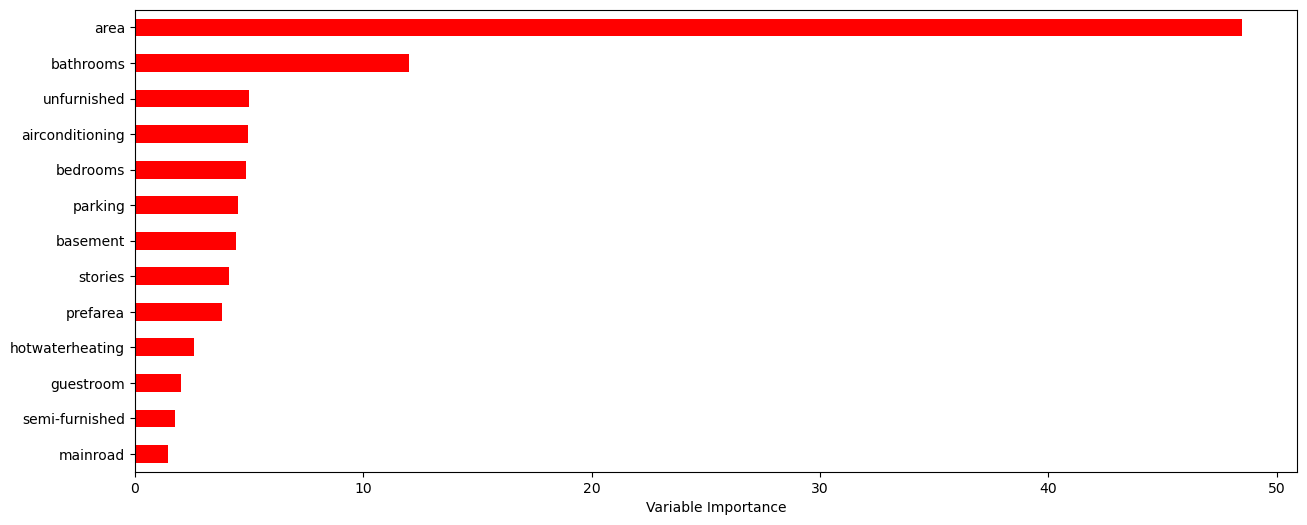

<Figure size 2000x1500 with 0 Axes>

In [103]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=xtrain.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.figure(figsize=(20,15))
plt.show()

In [104]:
Importance.sort_values('Importance', axis=0, ascending=False)

# area and bathrooms explain 65 percent variance togetehr considering they are the most important features

,Importance
area,48.485184
bathrooms,11.988778
unfurnished,4.995267
airconditioning,4.970612
bedrooms,4.850220
parking,4.511974
basement,4.415406
stories,4.114559
prefarea,3.830687
hotwaterheating,2.582909


In [105]:
# creating new X based on selective features 
# taking features that could give 85% variance together
x_new=df_scaled.drop(['unfurnished','guestroom','basement','hotwaterheating','semi-furnished','mainroad'],axis=1)
y=df_scaled['price']

In [107]:
lr=LinearRegression()
ridge_r=Ridge(alpha=0.5)
lasso_r=Lasso(alpha=0.1)

In [108]:
kf=KFold(n_splits=3,shuffle=True,random_state=2)
for model, name in zip([lr,ridge_r,lasso_r],['Ridge','Lasso']):
    rmse=[]
    for train,test in kf.split(x_new,y):
        x_train,x_test=x_new.iloc[train,:],x_new.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        Y_predict=model.predict(x_test)
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Y_predict)))
    print(rmse)
    print("Cross_Validated_rmse_score: %0.03f (+/- %0.5f) [%s]" % (np.mean(rmse),np.var(rmse,ddof=1),name))

[1.7082305631469963e-16, 8.676408209387423e-16, 2.8951408983448007e-16]
Cross_Validated_rmse_score: 0.000 (+/- 0.00000) [Ridge]
[0.011027676613287489, 0.012502591001708177, 0.010423602572157584]
Cross_Validated_rmse_score: 0.011 (+/- 0.00000) [Lasso]


#Summarize the overall model and listing down the measures to prove that it is a good model.

Initially we built linear regression the with all features with scaling 
RMSE of Base Model :0.12382556885301842


After Building random forest model with all features to find out the feature importance in the model. 
the RMSE: 0.12832394517375786
    
After finding all features which can show 85% variance towards we built a linear regression using ridge and lasso  using KFold on those partiular features and  
then RMSE has gradually been reduced giving 


Cross_Validated_rmse_score: 0.000 (+/- 0.00000) [Ridge]
Cross_Validated_rmse_score: 0.011 (+/- 0.00000) [Lasso]

This shows a gradual decrese in RMSE considering the Ridge, Lasso could be a better model